<a href="https://colab.research.google.com/github/Parkhat-archive/Data-Science-Portfolio/blob/master/Google_Stock_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install quandl

In [ ]:
!pip install pandas
!pip install sklearn


In [ ]:
import pandas as pd
import quandl
import math
import datetime
import numpy as np
from sklearn import model_selection
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle 

style.use("ggplot")


quandl.ApiConfig.api_key = "4D3wFRAoXX6htYutfeQ9"
df = quandl.get("WIKI/GOOGL")

#define importat features
df = df[["Adj. Open" , "Adj. High", "Adj. Low", "Adj. Close", "Adj. Volume"]]

In [ ]:
df.head


<bound method NDFrame.head of               Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume
Date                                                                       
2004-08-19    50.159839    52.191109    48.128568    50.322842   44659000.0
2004-08-20    50.661387    54.708881    50.405597    54.322689   22834300.0
2004-08-23    55.551482    56.915693    54.693835    54.869377   18256100.0
2004-08-24    55.792225    55.972783    51.945350    52.597363   15247300.0
2004-08-25    52.542193    54.167209    52.100830    53.164113    9188600.0
...                 ...          ...          ...          ...          ...
2018-03-21  1092.570000  1108.700000  1087.210000  1094.000000    1990515.0
2018-03-22  1080.010000  1083.920000  1049.640000  1053.150000    3418154.0
2018-03-23  1051.370000  1066.780000  1024.870000  1026.550000    2413517.0
2018-03-26  1050.600000  1059.270000  1010.580000  1054.090000    3272409.0
2018-03-27  1063.900000  1064.540000   997.620000  1006.94

In [ ]:
#percent volatolity(high - low percent)
df['HL_PCT'] = (df["Adj. High"] - df["Adj. Close"]) / df["Adj. Close"] * 100.0
#Daily Percent Change 
df['PCT_Change'] = (df["Adj. Close"] - df["Adj. Open"]) / df["Adj. Open"] * 100.0

#          price           x          x              x
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', "Adj. Volume"]]

In [ ]:
forecast_column = 'Adj. Close'
df.fillna(-99999, inplace= True) #better than getting rid of data c.SENDTEX

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
forecast_out = int(math.ceil(0.01*len(df))) #1 percent of dataframe

df["label"] = df[forecast_column].shift(-forecast_out)
 
print(df.head())
print(df.tail())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.639972
2004-08-20   54.322689  0.710922    7.227007   22834300.0  69.078238
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  67.839414
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  68.912727
2004-08-25   53.164113  1.886792    1.183658    9188600.0  70.668146
            Adj. Close    HL_PCT  PCT_Change  Adj. Volume  label
Date                                                            
2018-01-30     1177.37  0.896914   -0.029718    1792602.0    NaN
2018-01-31     1182.22  0.346805   -0.134312    1643877.0    NaN
2018-02-01     1181.59  0.495942    0.476195    2774967.0    NaN
2018-02-02     1119.20  1.081129   -0.729098    5798880.0    NaN
2018-02-05     1068.76  4.325574   -2.893850    3742469.0    NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X = np.array(df.drop(['label'], 1))


#scale new values along with your old values
X = preprocessing.scale(X)
X= X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df["label"])


print(len(X), len(y))

3355 3355


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

In [ ]:
clf = LinearRegression() # try svm.SVR(kernel=poly) LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
'''
with open('linearreression.pickle', 'wb') as f:
  pickle.dump(clf, f)

pickle_in = open('linearresgression.pickle', 'rb')
clf = pickle.load(pickle_in)
'''
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9776577968212726


In [ ]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1014.15362869 1055.2903019  1057.3539943  1057.31026283 1067.17440832
 1067.9517857  1075.25953164 1067.05417828 1077.65395778 1072.56358174
 1069.19938713 1065.80661463 1066.82243315 1061.28713259 1073.59717625
 1059.53946107 1059.42153239 1075.73082027 1077.09472099 1081.76392128
 1097.62898257 1087.27167738 1060.13239435 1060.27492286 1048.6996515
 1034.52151583 1042.87029963 1057.29053655 1069.44906133 1074.00070433
 1077.00964784 1072.81370304 1076.32709947 1082.07540989] 0.9776577968212726 34


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


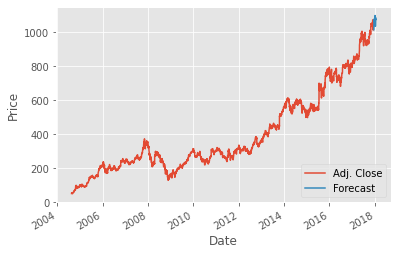

In [ ]:
#set date on the axis
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date]= [np.nan for _ in range(len(df.columns)-1)] + [i] 
  #df.loc the index of df

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()